In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
crime_df = pd.read_csv('F:\\PYTHON\\DATA SCIENCE\\CLUSTERING\\Assignments\\crime_data.csv',names = ['city','murder','Assualt','Urbanpop','Rape']  )
# Renaming column names

In [3]:
crime_df = crime_df.drop(crime_df.index[0] , axis = 0).reset_index()

In [4]:
crime_df.drop('index' , axis = 1 ,inplace=True)

In [5]:
crime_df.head()

,city,murder,Assualt,Urbanpop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10,263,48,44.5
2,Arizona,8.1,294,80,31
3,Arkansas,8.8,190,50,19.5
4,California,9,276,91,40.6


In [6]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   city      50 non-null     object
 1   murder    50 non-null     object
 2   Assualt   50 non-null     object
 3   Urbanpop  50 non-null     object
 4   Rape      50 non-null     object
dtypes: object(5)
memory usage: 1.0+ KB


In [7]:
crime_df1 = crime_df[['murder','Rape']].astype('float')

In [8]:
crime_df2 = crime_df[['Assualt','Urbanpop']].astype('int')

In [9]:
crime_df = pd.concat([crime_df.iloc[ : , 0],crime_df1,crime_df2],axis = 1)
#Changing data type

In [10]:
crime_df

,city,murder,Rape,Assualt,Urbanpop
0,Alabama,13.2,21.2,236,58
1,Alaska,10.0,44.5,263,48
2,Arizona,8.1,31.0,294,80
3,Arkansas,8.8,19.5,190,50
4,California,9.0,40.6,276,91
5,Colorado,7.9,38.7,204,78
6,Connecticut,3.3,11.1,110,77
7,Delaware,5.9,15.8,238,72
8,Florida,15.4,31.9,335,80
9,Georgia,17.4,25.8,211,60


In [11]:
X = crime_df.iloc[ : , 1:]

In [12]:
#Standardizing data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_df = scalar.fit_transform(X)

# Hierarchical Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

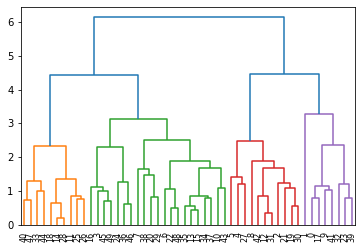

In [14]:
dendogram = sch.dendrogram(sch.linkage(scaled_df , method = 'complete'))
# From dendogram we can cut number of clusters to be formed

In [15]:
cluster_dendogram = AgglomerativeClustering(n_clusters=4 , linkage = 'complete')
Predict = cluster_dendogram.fit(scaled_df)

In [16]:
crime_df['Cluster_dendogram'] = Predict.labels_
group_1 = crime_df.groupby(crime_df['Cluster_dendogram'])

In [17]:
group_1.get_group(0)
#Getting indivigual group.

,city,murder,Rape,Assualt,Urbanpop,Cluster_dendogram
0,Alabama,13.2,21.2,236,58,0
1,Alaska,10.0,44.5,263,48,0
9,Georgia,17.4,25.8,211,60,0
17,Louisiana,15.4,22.2,249,66,0
23,Mississippi,16.1,17.1,259,44,0
32,North Carolina,13.0,16.1,337,45,0
39,South Carolina,14.4,22.5,279,48,0
41,Tennessee,13.2,26.9,188,59,0


In [18]:
crime_df.groupby(crime_df['Cluster_dendogram']).agg(['mean']).reset_index()

,Cluster_dendogram,murder,Rape,Assualt,Urbanpop
,,mean,mean,mean,mean
0,0,14.087500,24.537500,252.750000,53.500000
1,1,5.871429,18.580952,134.476190,70.761905
2,2,11.054545,32.618182,264.090909,79.090909
3,3,3.180000,11.630000,78.700000,49.300000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster_dendogram', ylabel='Urbanpop'>

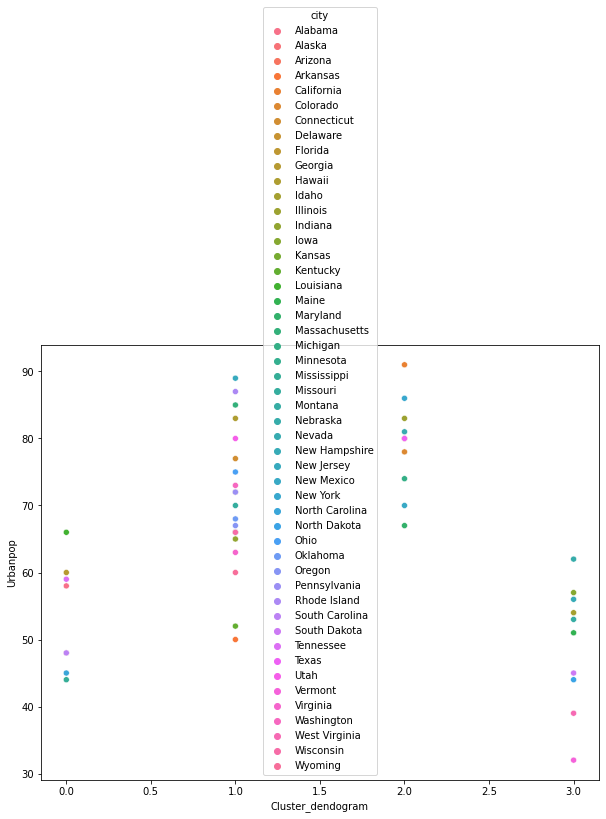

In [19]:

plt.figure(figsize=(10,8))
sns.scatterplot(crime_df['Cluster_dendogram'],crime_df.Urbanpop,data = crime_df , hue=crime_df['city'] ,legend='brief')
# 4 clusters created after cutting down dendogram

# DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
dbscan = DBSCAN(eps = 1.3 , min_samples= 6)
dbscan_cluster = dbscan.fit(scaled_df)

In [22]:
crime_df['clusters_DBSCAN'] = dbscan_cluster.labels_

In [23]:
crime_df

,city,murder,Rape,Assualt,Urbanpop,Cluster_dendogram,clusters_DBSCAN
0,Alabama,13.2,21.2,236,58,0,0
1,Alaska,10.0,44.5,263,48,0,-1
2,Arizona,8.1,31.0,294,80,2,1
3,Arkansas,8.8,19.5,190,50,1,2
4,California,9.0,40.6,276,91,2,-1
5,Colorado,7.9,38.7,204,78,2,1
6,Connecticut,3.3,11.1,110,77,1,2
7,Delaware,5.9,15.8,238,72,1,2
8,Florida,15.4,31.9,335,80,2,-1
9,Georgia,17.4,25.8,211,60,0,0


In [24]:
group2 = crime_df.groupby(crime_df.clusters_DBSCAN)

In [25]:
group2.get_group(-1)
# These are the outliers 

,city,murder,Rape,Assualt,Urbanpop,Cluster_dendogram,clusters_DBSCAN
1,Alaska,10.0,44.5,263,48,0,-1
4,California,9.0,40.6,276,91,2,-1
8,Florida,15.4,31.9,335,80,2,-1
32,North Carolina,13.0,16.1,337,45,0,-1


In [26]:
crime_df_1 = group2.get_group(0)
crime_df_2 = group2.get_group(1)
crime_df_3 = group2.get_group(2)

In [27]:
crime_df_new = pd.concat([crime_df_1,crime_df_2,crime_df_3], axis = 0)

In [28]:
crime_df_new = crime_df_new.reset_index()

In [29]:
crime_df_new.drop('index' , axis =1 ,inplace = True)

In [30]:
crime_df_new
# new data set after removing outliers

,city,murder,Rape,Assualt,Urbanpop,Cluster_dendogram,clusters_DBSCAN
0,Alabama,13.2,21.2,236,58,0,0
1,Georgia,17.4,25.8,211,60,0,0
2,Louisiana,15.4,22.2,249,66,0,0
3,Mississippi,16.1,17.1,259,44,0,0
4,South Carolina,14.4,22.5,279,48,0,0
5,Tennessee,13.2,26.9,188,59,0,0
6,Arizona,8.1,31.0,294,80,2,1
7,Colorado,7.9,38.7,204,78,2,1
8,Illinois,10.4,24.0,249,83,2,1
9,Maryland,11.3,27.8,300,67,2,1


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


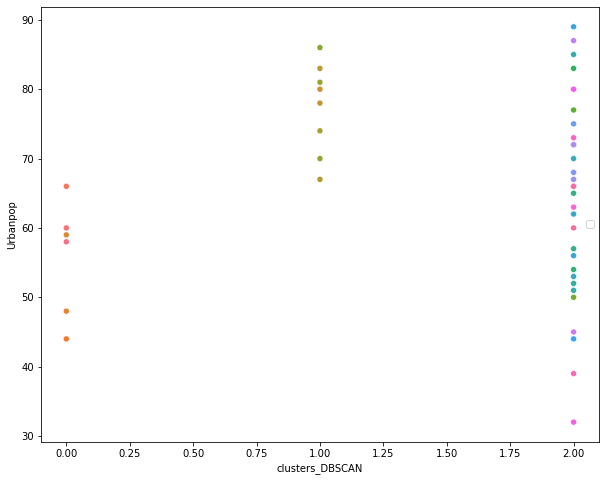

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(crime_df_new['clusters_DBSCAN'],crime_df_new.Urbanpop,data = crime_df , hue=crime_df_new['city'] ,legend=False)
plt.legend(loc='center right')
# Scatter PLot

# Kmeans

In [32]:
scaler_k = StandardScaler()
scaled_kdf = scaler_k.fit_transform(crime_df_new.iloc[: ,1:])

In [33]:
from sklearn.cluster import KMeans

In [34]:
# Deciding clusters based on elbow method
wcss= []

for i in range(1,7):
    cluster_new = KMeans(n_clusters= i , random_state= 0)
    cluster_new.fit(scaled_kdf)
    wcss.append(cluster_new.inertia_)

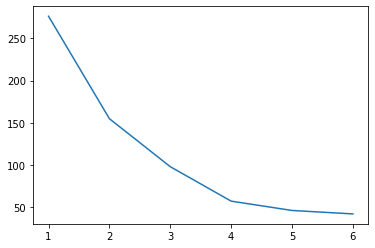

In [35]:
plt.plot(range(1,7),wcss)
#  Elbow point indicates ideal clusters = 2

In [36]:
cluster_kmeans1 = KMeans(n_clusters=2 , random_state= 0)
cluster_kmeans = cluster_kmeans1.fit(scaled_kdf)

In [37]:
crime_df_new['clusters_kmeans'] = cluster_kmeans.labels_

In [38]:
crime_df_new

,city,murder,Rape,Assualt,Urbanpop,Cluster_dendogram,clusters_DBSCAN,clusters_kmeans
0,Alabama,13.2,21.2,236,58,0,0,1
1,Georgia,17.4,25.8,211,60,0,0,1
2,Louisiana,15.4,22.2,249,66,0,0,1
3,Mississippi,16.1,17.1,259,44,0,0,1
4,South Carolina,14.4,22.5,279,48,0,0,1
5,Tennessee,13.2,26.9,188,59,0,0,1
6,Arizona,8.1,31.0,294,80,2,1,1
7,Colorado,7.9,38.7,204,78,2,1,1
8,Illinois,10.4,24.0,249,83,2,1,1
9,Maryland,11.3,27.8,300,67,2,1,1


In [39]:
crime_df_new.groupby('clusters_kmeans').agg(['mean']).reset_index()
# Mean of created 2 clusters.

,clusters_kmeans,murder,Rape,Assualt,Urbanpop,Cluster_dendogram,clusters_DBSCAN
,,mean,mean,mean,mean,mean,mean
0,0,5.003226,16.338710,116.483871,63.838710,1.645161,2.000000
1,1,12.460000,28.133333,247.733333,68.933333,1.200000,0.666667


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


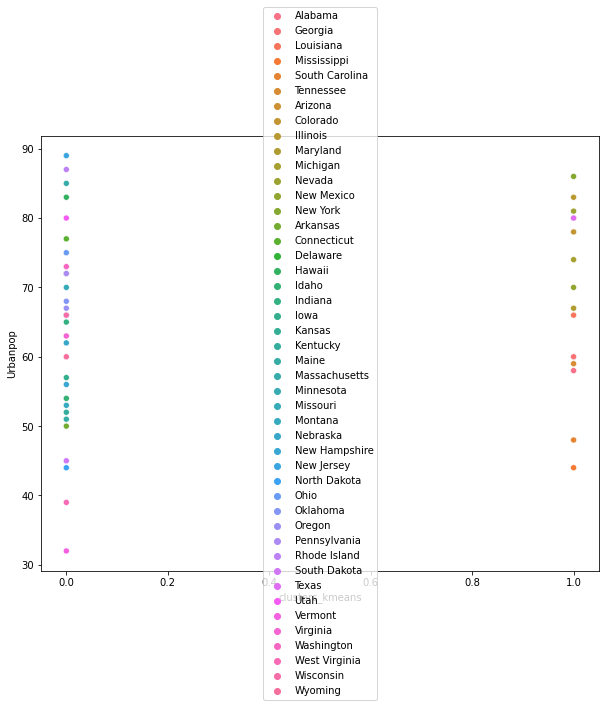

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(crime_df_new['clusters_kmeans'],crime_df_new.Urbanpop,data = crime_df , hue=crime_df_new['city'] )
plt.legend(loc='center')
#Plotting Clusters.